## **Open Source Data Repositories**
1. [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) - Small, manageable and standard datasets from almost all domains

2. [USA data.gov Initiative](https://www.data.gov/) - US government open-sourced data. Lots of untapped potential.

3. [World Bank Data](https://data.worldbank.org/) - Econometric, administrative and credit data for almost all countries. Low granularity(less data points), high latency (slow updates).

4. [Quandl](https://www.quandl.com/) - Fianancial and Econometric data. High granularity, low latency(nightly updates).

5. [Kaggle Datasets](https://www.kaggle.com/datasets) - Pretty much everything. Good forum conversations.  

## **PIMA Indian Diabetes Data - UCI**
You can access the Diabetes Data and its relevant documentation [here on UCI website](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

In [2]:
import pandas as pd
import numpy as np

In [3]:
diabetes = pd.read_csv("pima_indians_diabetes.csv")
diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


**Note - that the data doesn't have a header. So we better define column names first and specify that to read_csv files**

In [4]:
labels = ["Pregnant", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

diabetes = pd.read_csv("pima_indians_diabetes.csv",names=labels)
diabetes.head()

,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Data Exploration**

In [7]:
# Find data type for each attribute 
print("Data type of each attribute:")
diabetes.dtypes

Data type of each attribute:


Pregnant                      int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# Generate statistical summary 
description = diabetes.describe()
print("Statistical summary of the data:\n")
description

Statistical summary of the data:



,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### **Check the prediction outcome**

In [10]:
class_counts = diabetes.groupby('Outcome').size() 
print("Class breakdown of the data:\n")
print(class_counts)

Class breakdown of the data:

Outcome
0    500
1    268
dtype: int64


#### **Converting Outcome into categorical**

In [11]:
diabetes['Outcome'] = diabetes['Outcome'].astype('category')

In [14]:
diabetes.dtypes

Pregnant                       int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

##### Check summary statistics

In [12]:
diabetes.describe()

,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [13]:
diabetes["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
# Compute correlation matrix 
correlations = diabetes.corr(method = 'pearson') 
print("Correlations of attributes in the data:\n") 
correlations

Correlations of attributes in the data:



C:\Users\Jayanth\AppData\Local\Temp\ipykernel_3712\3910332407.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = diabetes.corr(method = 'pearson')


,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


#### **Check for Outliers**

<IPython.core.display.Javascript object>


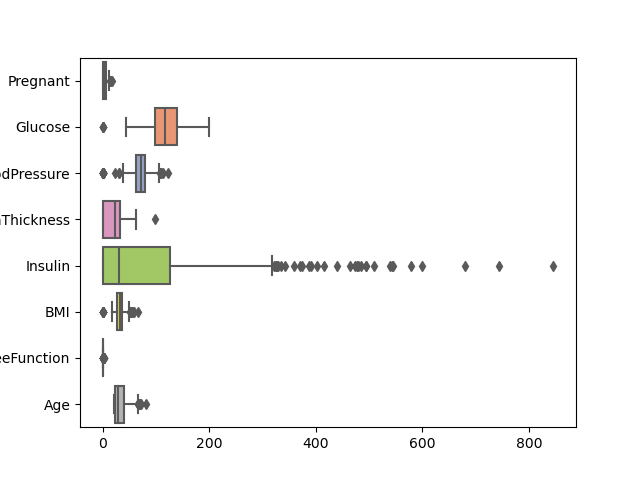

In [18]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib notebook

fig, axs = plt.subplots()
sns.boxplot(data=diabetes,orient='h',palette="Set2")
plt.show()

### **Dealing with Outliers**

**Reporting upper whisker for Insulin**

In [19]:
q75, q25 = np.percentile(diabetes["Insulin"], [75 ,25])

iqr = q75-q25

print("IQR",iqr)

whisker = q75 + (1.5*iqr)

print("Upper whisker",whisker)

IQR 127.25
Upper whisker 318.125


###### **Clip/Squash the values beyond certain point *
**Here all values of Insulin greater than the upper whisker will be replaced with 318.125**

In [20]:
diabetes["Insulin"] = diabetes["Insulin"].clip(upper=whisker)

<IPython.core.display.Javascript object>


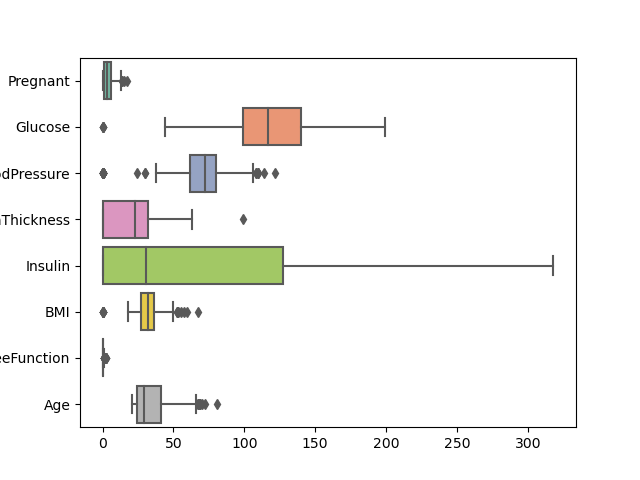

In [21]:
fig, axs = plt.subplots()
sns.boxplot(data=diabetes,orient='h',palette="Set2")
plt.show()

#### Check missing values

**Note - While there are no apparent missing values, through data exploration we should notice that certain columns have 0 values which is not possible.**

In [36]:
print((diabetes.iloc[:,[1,2,3,4,5]] == 0).sum())

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


#### **Replacing 0 with NA**

In [23]:
diabetes.iloc[:,[1,2,3,4,5]] = diabetes.iloc[:,[1,2,3,4,5]].replace(0, np.NaN)
diabetes.head()

,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#### **Sum of NA values across each column**

In [24]:
diabetes.isnull().sum(axis=0)

Pregnant                      0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Dealing with Missing Values

##### **A) Drop rows having NaN**
**This may lead to excessive loss of data. Use this method only if there is very less NA values**

In [25]:
print("Size before dropping NaN rows",diabetes.shape,"\n")
nan_dropped = diabetes.dropna()
print("\nSize after dropping NaN rows",nan_dropped.shape)

Size before dropping NaN rows (768, 9) 


Size after dropping NaN rows (392, 9)


##### **B) Drop row/columns having more than certain percentage of NaNs (more sensible)**

In [26]:
diabetes.isnull().mean()

Pregnant                    0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

#### **Dropping rows and columns having greater than certain % NA**

In [27]:
print("Size before dropping NaN rows",diabetes.shape,"\n")
## Dropping columns having more than 40% NA values
col_dropped = diabetes.loc[:, diabetes.isnull().mean() < .3]
## Dropping rows having more than 30% NA values
row_dropped = diabetes.loc[diabetes.isnull().mean(axis=1) < .3, :]
print("\nSize after dropping columns",col_dropped.shape)
print("Size after dropping rows",row_dropped.shape)

Size before dropping NaN rows (768, 9) 


Size after dropping columns (768, 8)
Size after dropping rows (733, 9)


##### **C) Impute missing values**
1. Some constant value that is considered "normal" in the domain
2. Summary statistic like Mean, Median, Mode
3. **A value estimated by algorithm or predictive model** - Will be taught later. Don't get ahead of yourself or you'll miss the real fun ;)

##### **Mean imputation**

In [29]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy="mean")
mean_imputer.fit(diabetes)
imputed_diabetes = pd.DataFrame(mean_imputer.fit_transform(diabetes),columns=labels)

**Important Take-Away - Transformations should be applied in a 2-phase strategy**

#### Range Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
range_scaler = MinMaxScaler()
range_scaler.fit(imputed_diabetes)
range_scaled_diabetes = pd.DataFrame(range_scaler.fit_transform(imputed_diabetes),columns=labels)

**Notice the summary statistics after range scaling. The range of each column should be between 0-1**

In [31]:
range_scaled_diabetes.describe()

,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.426031,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.197299,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.353473,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.426031,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.426031,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####  Standardization

In [32]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(imputed_diabetes)
std_diabetes = pd.DataFrame(standardizer.fit_transform(imputed_diabetes),columns=labels)

**Notice the summary statistics after standardization. The standard deviation of each column should be 1**

In [33]:
std_diabetes.describe()

,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-3.561966e-16,6.915764e-16,7.956598e-16,6.707597e-17,3.515706e-16,2.451743e-16,1.931325e-16,7.401487e-17
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.521670e+00,-2.160728e+00,-2.075119e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.727737e-01,-3.679958e-01,-7.215397e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,8.087936e-16,0.000000e+00,-8.363615e-03,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.240194e-01,0.000000e+00,6.029301e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,3.906578e+00,2.541850e+00,4.102655e+00,7.950467e+00,2.911036e+00,5.042087e+00,5.883565e+00,4.063716e+00,1.365896e+00


##### Binning 
**Going ahead you shall realize that having numeric variable is the best for Data Science. However certain times for sake of explanation to the client one may want to convert a numeric variable into multiple classes. This can be done using binning.**

*You will learn better strategys to club things based on similar behaviour. Binning is very trivial against other advanced techniques that you will learn ahead.*

In [34]:
bins = [0,25,30,35,40,100]

group_names = ['Malnutritioned', 'Under-Weight', 'Healthy', 'Over-Wight',"Obese"]
diabetes['BMI Class'] = pd.cut(diabetes['BMI'], bins, labels=group_names)
diabetes.head(3)

,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Healthy
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Under-Weight
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Malnutritioned


##### Dummification
**This is used to encode multi-level columns (eg. Malnutritioned, Under-Weight, Healthy) to much more explicit binary encoding (1 or 0 for each level denoting presense or absence).**

*Lets just say this is a more cleaner way of representing features and computer likes it this way.*

In [35]:
dummified_data = pd.concat([diabetes.iloc[:,:-1],pd.get_dummies(diabetes['BMI Class'])],axis=1)
dummified_data.head()

,Pregnant,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Malnutritioned,Under-Weight,Healthy,Over-Wight,Obese
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,0,0,1,0,0
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,0,1,0,0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,1,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,1,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,0,0,1


**Notice that now we have seperate columns for Malnutritioned, Under-Weight, Healthy having 0 or 1**